<a href="https://colab.research.google.com/github/abhijitguinkatwa/machine-learning-project/blob/main/Happiness_index_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
happy = pd.read_csv('/content/Happiness.csv')

happy_data = pd.DataFrame(happy)
happy_data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
# So our target variable this time is Happiness Rank, first we check how large our dataset is.

happy_data.shape

(158, 12)

In [4]:
happy_data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [5]:
happy_data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


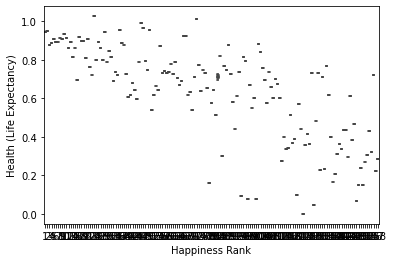

In [6]:
sns.boxplot(happy_data['Happiness Rank'], happy_data['Health (Life Expectancy)']) 

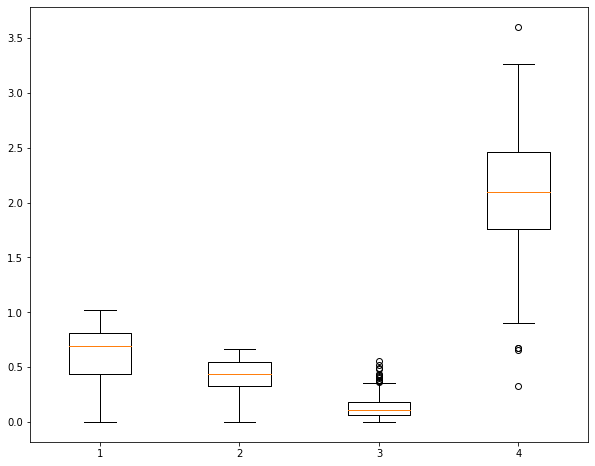

In [7]:
# To know more about boxplots - https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

fig = plt.figure(figsize =(10,8))
data = [happy_data['Health (Life Expectancy)'], happy_data['Freedom'], happy_data['Trust (Government Corruption)'], 
        happy_data['Dystopia Residual']]

plt.boxplot(data)
 
# show plot
plt.show()

Now we bifurcate the data into a dataset having 'Trust (Government Corruption)' and one not having it.

In [8]:
temp = happy_data.copy()
new_data = temp.drop(['Trust (Government Corruption)'], axis = 1)
new_data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.45811,2.45176


In [9]:
# Segregating target variable and removing useless columns.

y = new_data['Happiness Rank']
fin_data = new_data.drop(['Region', 'Country', 'Happiness Rank'], axis = 1)

In [10]:
fin_data.columns

Index(['Happiness Score', 'Standard Error', 'Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [13]:
scale = StandardScaler()
data = scale.fit_transform(fin_data)

# Saving the StandardScaler class file
import pickle
pickle.dump(scale, open('/content/Happiness.csvScaler.pickle','wb'))

# sc = pickle.load(open('file/path/scaler.pkl','rb')) to load the pickled file.

In [14]:
# Now you have to use index for columns and rows like in numpy to access values from the data.
print(data[0][0])

1.937360050111343


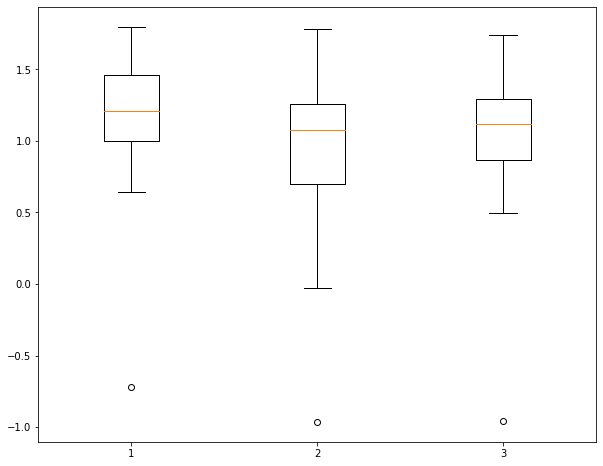

In [15]:
# Now we compare the standardized data:- 
# 'Health (Life Expectancy)'] - data[4]
# happy_data['Freedom'] - data[5]
# happy_data['Trust (Government Corruption)'] - Not present
# happy_data['Dystopia Residual'] - data[7]

fig = plt.figure(figsize =(10,8))
inserting = [data[4], data[5], data[7]]

plt.boxplot(inserting)
 
# show plot
plt.show()

In [16]:
Xtrain, Xtest, ytrain, ytest = train_test_split(data, y, test_size=0.1)

In [17]:
reg = LinearRegression()

reg.get_params(deep = True)

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [18]:
vari = reg.fit(Xtrain, ytrain)

print(reg.score(Xtrain, ytrain))

0.9860164463226418


In [19]:
pred = reg.predict(Xtest)

r2_score = reg.score(Xtest,ytest)
print(r2_score)

0.9837159674651402
